# Read coords from existing DEG

In [1]:
import deg

# read graph from drive
graph_file = "G:/My Drive/HTW/PhD/2DGraph/automatic/L2_K4_AddK10Eps0.2High_SwapK10-0StepEps0.001LowPath5Rnd100+0_improveNonRNGAndSecondHalfOfNonPerfectEdges_RNGAddMinimalSwapAtStep0.add_rng_opt.deg"

graph_file = "G:/My Drive/HTW/PhD/2DGraph/V30_L2_K4_AddK8Eps0.2High_SwapK8-0StepEps0.001Low.deg"

# use features as coords
coords = deg.read_deg_vertices(graph_file)
print(coords.shape)
coords.head()

(30, 4)


,id,feature,color,geometry
0,0,"[73.01615, 25.27309]",black,POINT (73.016 25.273)
1,1,"[76.6436, 81.619644]",black,POINT (76.644 81.62)
2,2,"[59.095734, 99.37522]",black,POINT (59.096 99.375)
3,3,"[92.944084, 14.437962]",black,POINT (92.944 14.438)
4,4,"[38.930744, 35.24164]",black,POINT (38.931 35.242)


s = coords.loc[5]  # Assuming s is the Series
index_label = s.index  # This returns the index label (e.g., 5 if it's an integer index)# Create random coords

In [2]:
from utils import create_random_coords

# example
coords = create_random_coords(n=40, scale=50, seed=42)
print(coords.shape)
coords.head()

(40, 4)


,id,feature,color,geometry
0,0,"[18.727005, 47.535717]",black,POINT (18.72701 47.53572)
1,1,"[36.599697, 29.932924]",black,POINT (36.5997 29.93292)
2,2,"[7.800932, 7.799726]",black,POINT (7.80093 7.79973)
3,3,"[2.9041805, 43.308807]",black,POINT (2.90418 43.30881)
4,4,"[30.05575, 35.40363]",black,POINT (30.05575 35.40363)


# Create the base graphs

In [3]:
from base_graph import create_mrng

mrng_edges = create_mrng(coords)

from base_graph import create_knn_graph_2d, create_minimum_spanning_tree_2d, create_relative_neighborhood_graph_2d, create_gabriel_graph_2d, create_delaunay_graph_2d

# create GeoDataFrame
knn_edges = create_knn_graph_2d(coords)
mst_edges = create_minimum_spanning_tree_2d(coords)
rng_edges = create_relative_neighborhood_graph_2d(coords)
gg_edges = create_gabriel_graph_2d(coords)
dg_edges = create_delaunay_graph_2d(coords)

knn_edges.head()

C:\Users\Neiko\miniconda3\envs\city2graph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


geometry     weight  source  \
0 12   LINESTRING (18.72701 47.53572, 22.8035 39.2588)   9.226333       0   
  27   LINESTRING (18.72701 47.53572, 29.895 46.09371)  11.260704       0   
  33  LINESTRING (18.72701 47.53572, 7.04621 40.10985)  13.841404       0   
  34  LINESTRING (18.72701 47.53572, 3.72753 49.34435)  15.108121       0   
1 37  LINESTRING (36.5997 29.93292, 35.34287 36.45036)   6.637513       1   

      target  color  
0 12      12  black  
  27      27  black  
  33      33  black  
  34      34  black  
1 37      37  black

# build new DEG

In [4]:
import deglib
from utils import extract_features
from deg import get_deg_edges

features = extract_features(coords)

# build index
deg1_graph = deglib.builder.build_from_data(features, edges_per_vertex=4, extend_k=10, extend_eps=0.2, optimization_target=deglib.builder.OptimizationTarget.StreamingData)
deg1_graph_ro = deglib.graph.ReadOnlyGraph.from_graph(deg1_graph)
deg1_edges = get_deg_edges(deg1_graph_ro)
print(deg1_graph_ro)

# build index
deg2_graph = deglib.builder.build_from_data(features, edges_per_vertex=4, extend_k=10, extend_eps=0.2, optimization_target=deglib.builder.OptimizationTarget.LowLID)
deg2_graph_ro = deglib.graph.ReadOnlyGraph.from_graph(deg2_graph)
deg2_edges = get_deg_edges(deg2_graph_ro)
print(deg2_graph_ro)

# build index
deg3_graph = deglib.builder.build_from_data(features, edges_per_vertex=4, extend_k=10, extend_eps=0.2, optimization_target=deglib.builder.OptimizationTarget.HighLID)
deg3_graph_ro = deglib.graph.ReadOnlyGraph.from_graph(deg3_graph)
deg3_edges = get_deg_edges(deg3_graph_ro)
print(deg3_graph_ro)

ReadOnlyGraph(size=40 edges_per_vertex=4 dim=2)
ReadOnlyGraph(size=40 edges_per_vertex=4 dim=2)
ReadOnlyGraph(size=40 edges_per_vertex=4 dim=2)


# improve edges of DEG

In [5]:
builder = deglib.builder.EvenRegularGraphBuilder(deg3_graph, improve_k=10, improve_eps=0.001, swap_tries=1000)

avg_edge_weight1 = deglib.analysis.calc_avg_edge_weight(deg3_graph)
builder.build()
avg_edge_weight2 = deglib.analysis.calc_avg_edge_weight(deg3_graph)
print(avg_edge_weight1," --> ", avg_edge_weight2)

# use features as coords
deg4_graph_ro = deglib.graph.ReadOnlyGraph.from_graph(deg3_graph)
deg4_edges = get_deg_edges(deg4_graph_ro)
print(deg4_edges.shape)
print(deg4_edges[:3])

263.6258850097656  -->  74.4041519165039
(80, 5)
   source  target                                           geometry  \
0       0       4  LINESTRING (18.72701 47.53572, 30.05575 35.40363)   
1       0      12    LINESTRING (18.72701 47.53572, 22.8035 39.2588)   
2       0      27    LINESTRING (18.72701 47.53572, 29.895 46.09371)   

      weight  color  
0  16.599037  black  
1   9.226333  black  
2  11.260704  black  


# Remove non MRNG edges

In [6]:
# use features as coords
deg3_graph.remove_non_mrng_edges()
deg5_graph_ro = deglib.graph.ReadOnlyGraph.from_graph(deg3_graph)
deg5_edges = get_deg_edges(deg5_graph_ro)
print(deg5_edges.shape)
print(deg5_edges[:3])

(49, 5)
   source  target                                          geometry  \
0       0      12   LINESTRING (18.72701 47.53572, 22.8035 39.2588)   
1       0      33  LINESTRING (18.72701 47.53572, 7.04621 40.10985)   
2       1      19  LINESTRING (36.5997 29.93292, 34.21165 22.00763)   

      weight  color  
0   9.226333  black  
1  13.841404  black  
2   8.277266  black  


## Plot the Graphs

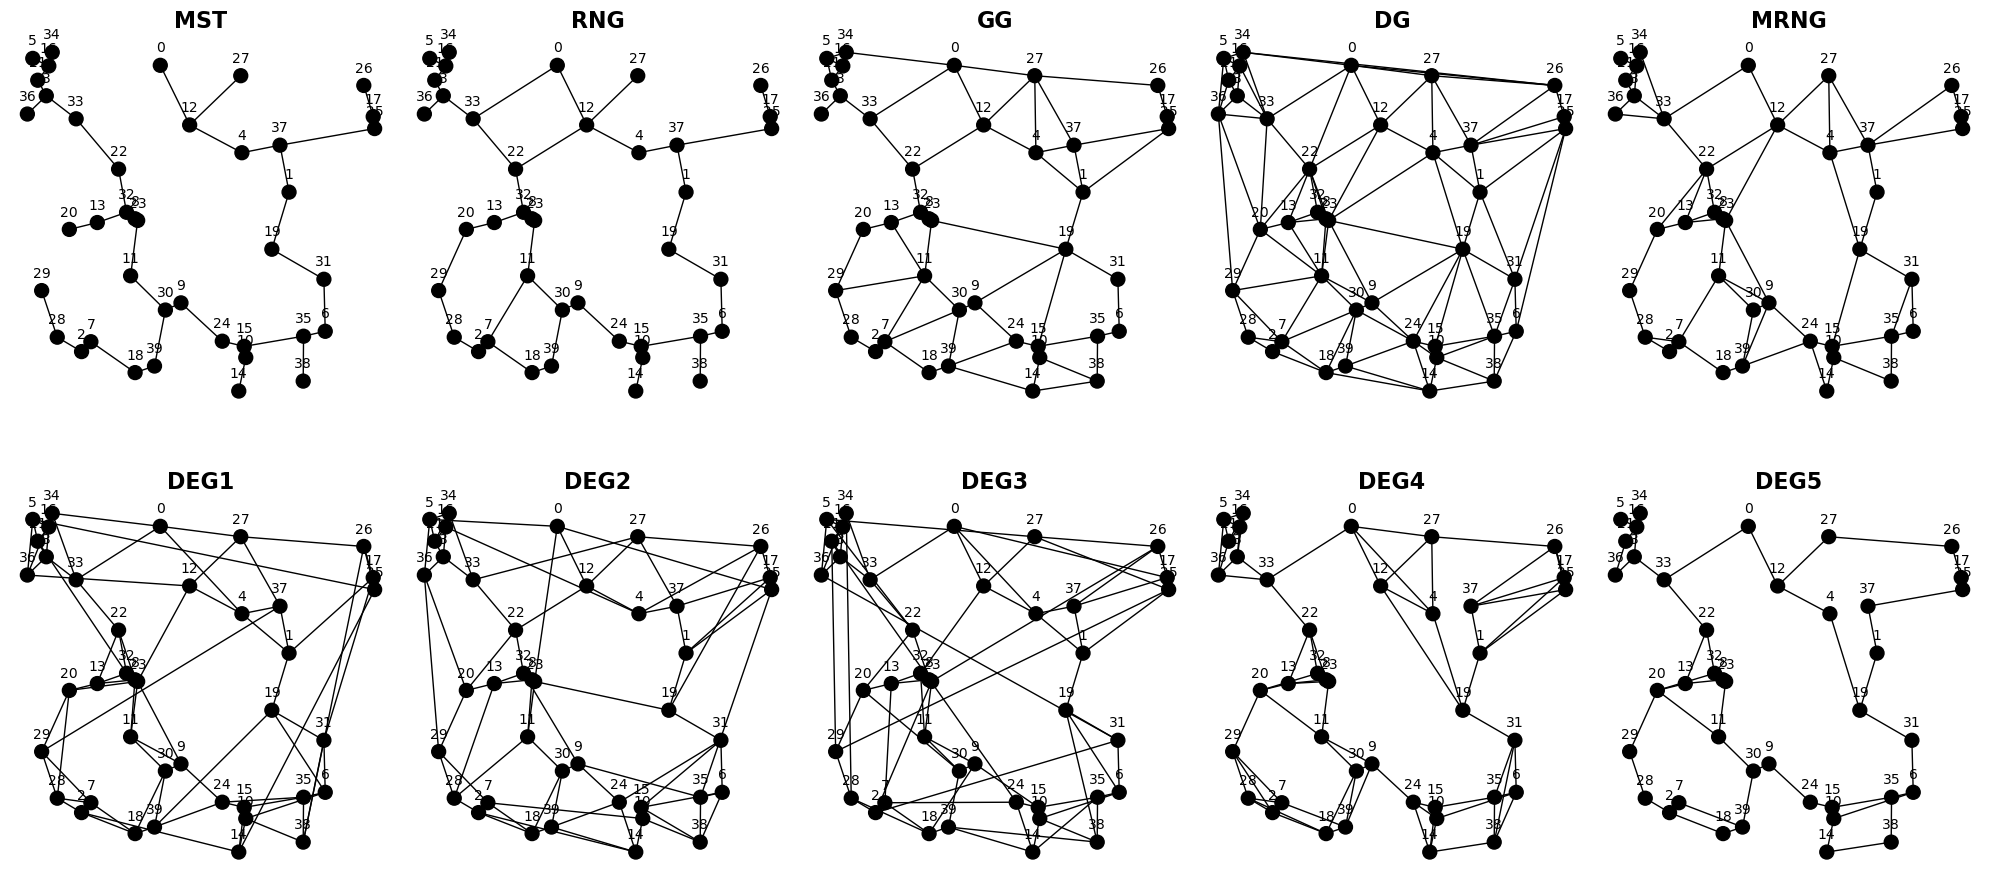

In [7]:
from enum import Enum
from plot import plot_graphs

class GraphType(Enum):
    KNN = ("kNN Graph", knn_edges)
    MST = ("MST", mst_edges)
    MRNG = ("MRNG", mrng_edges)
    RNG = ("RNG", rng_edges)
    GG = ("GG", gg_edges)
    DG = ("DG", dg_edges)
    DEG1 = ("DEG1", deg1_edges)
    DEG2 = ("DEG2", deg2_edges)
    DEG3 = ("DEG3", deg3_edges)
    DEG4 = ("DEG4", deg4_edges)
    DEG5 = ("DEG5", deg5_edges)

# select only desired graphs
selection = [GraphType.MST, GraphType.RNG, GraphType.GG, GraphType.DG, GraphType.MRNG, GraphType.DEG1, GraphType.DEG2, GraphType.DEG3, GraphType.DEG4, GraphType.DEG5]

# Example usage
plot_graphs(vertices=coords, graphs=selection, bg_color="white",
     text_color="black", marker_size=100, edge_color="black", edge_width=1, save_file=None)

# Edge Overlap

In [8]:
from evaluate import print_edge_overlap

print_edge_overlap("KNN", mrng_edges, knn_edges)
print_edge_overlap("MST", mrng_edges, mst_edges)
print_edge_overlap("RNG", mrng_edges, rng_edges)
print_edge_overlap("DG",  mrng_edges, dg_edges)
print_edge_overlap("GG",  mrng_edges, gg_edges)
print_edge_overlap("DEG1", mrng_edges, deg1_edges)
print_edge_overlap("DEG2", mrng_edges, deg2_edges)
print_edge_overlap("DEG3", mrng_edges, deg3_edges)
print_edge_overlap("DEG4", mrng_edges, deg4_edges)
print_edge_overlap("DEG5", mrng_edges, deg5_edges)

KNN       54/ 63 ( 85.71%)    54/ 95 ( 56.84%)  avg=  7.458
MST       39/ 63 ( 61.90%)    39/ 39 (100.00%)  avg=  5.362
RNG       43/ 63 ( 68.25%)    43/ 43 (100.00%)  avg=  5.920
DG        62/ 63 ( 98.41%)    62/104 ( 59.62%)  avg=  9.527
GG        48/ 63 ( 76.19%)    48/ 62 ( 77.42%)  avg=  7.568
DEG1      49/ 63 ( 77.78%)    49/ 80 ( 61.25%)  avg= 10.322
DEG2      45/ 63 ( 71.43%)    45/ 80 ( 56.25%)  avg= 10.284
DEG3      46/ 63 ( 73.02%)    46/ 80 ( 57.50%)  avg= 12.110
DEG4      49/ 63 ( 77.78%)    49/ 80 ( 61.25%)  avg=  7.552
DEG5      41/ 63 ( 65.08%)    41/ 49 ( 83.67%)  avg=  6.595


# Search Performance

In [11]:
from evaluate import exact_knn, calc_recall

features = extract_features(coords)
indices_exact, dist_exact = exact_knn(features, k=4)

# search query
graphs = {
    "DEG1": deg1_graph_ro,
    "DEG2": deg2_graph_ro,
    "DEG3": deg3_graph_ro,
    "DEG4": deg4_graph_ro,
    "DEG5": deg5_graph_ro
}

for name, g in graphs.items():
    indices_approx, distances_approx = g.search(features, eps=0.0, k=5)
    recall = calc_recall(indices_approx[:,1:], indices_exact)
    print(f"{name}: Recall = {recall:.3f}")

DEG1: Recall = 0.988
DEG2: Recall = 1.000
DEG3: Recall = 0.988
DEG4: Recall = 0.994
DEG5: Recall = 0.988
